In [1]:
import torch
import numpy as np

In [2]:
from model import SimpleCNN
model = SimpleCNN()

In [3]:
from loader import load
BATCH_SIZE = 64
train_loader, val_loader, test_loader = load(batch_size=BATCH_SIZE)

In [4]:
from trainer import train as train_model
from optimizer.sls_optimizer import SLSOptimizer 
from optimizer.rdls_optimizer import RDLSOptimizer 

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.mps.is_available() else "cpu")
print("Using device:", device)
#device = "cpu" 

model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = SLSOptimizer(model.parameters(), n_batches_per_epoch=len(train_loader) // BATCH_SIZE, line_search_fn="strong_wolfe") 
#optimizer = RDLSOptimizer(model.parameters())

#optimizer = torch.optim.SGD(model.parameters())

model, loss_history, step_size_history, c_function_evals = train_model(model, train_loader, val_loader, optimizer, criterion, device, 1)

Using device: cpu
Epoch [1/1], Loss: 0.7971
Validation Loss: 0.5192, Accuracy: 80.10%


Text(0.5, 1.0, 'Average Function Evaluations per Epoch')

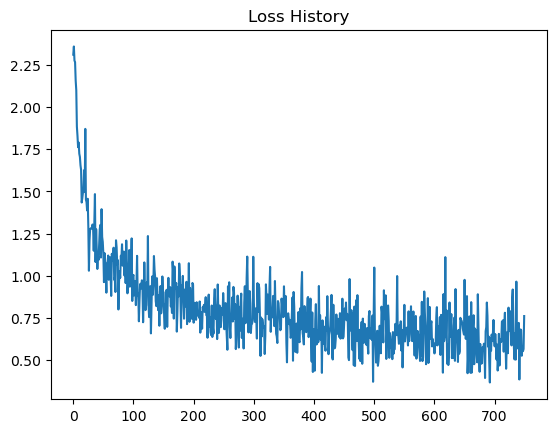

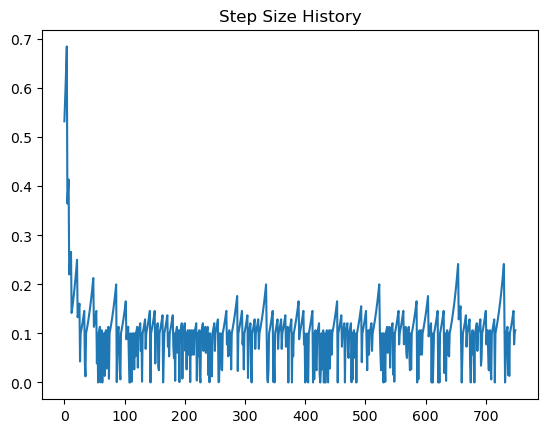

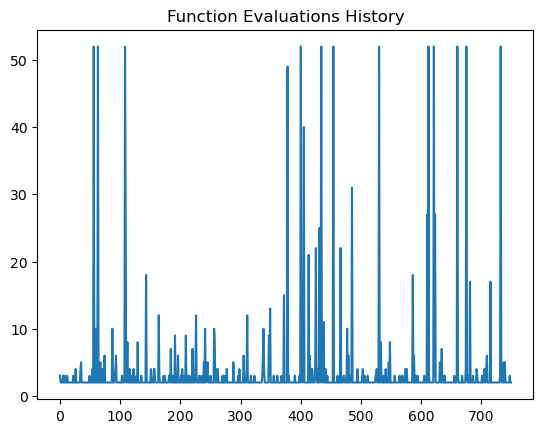

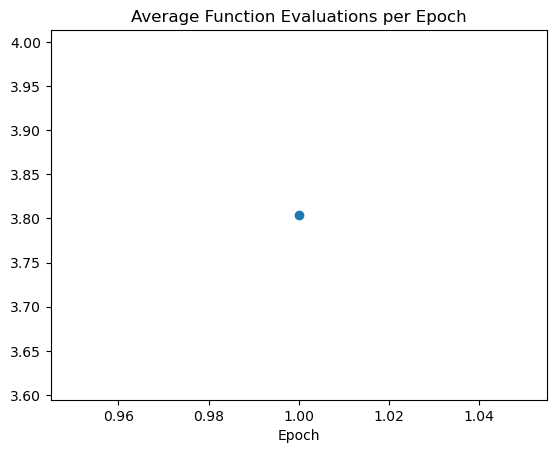

In [6]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(loss_history)
plt.title("Loss History")

plt.figure()
plt.plot(step_size_history)
plt.title("Step Size History")

function_evals = [c_function_evals[0]] + [
    c_function_evals[i] - c_function_evals[i - 1] for i in range(1, len(c_function_evals))
]
plt.figure()
plt.plot(function_evals)
plt.title("Function Evaluations History")

epoch_avg_evals = [
    np.mean(function_evals[i:i+len(train_loader)]) for i in range(0, len(function_evals), len(train_loader))
]
plt.figure()
plt.plot([i+1 for i in range(len(epoch_avg_evals))], epoch_avg_evals, marker='o')
plt.xlabel("Epoch")
plt.title("Average Function Evaluations per Epoch")